In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
Mix_density = np.array([0.998430,0.998378,0.998324,0.998272,0.998218,0.998162,0.998106,0.998050,0.997992,0.997934,0.997876,0.997816,0.997757,0.997697,0.997635,0.997574,0.997513,0.997449,0.997385,0.997321,0.997257,0.997191,0.997126,0.997060,0.996993,0.996925,0.996857,0.996788,0.996719,0.996649,0.996578,0.996507,0.996435,0.996364,0.996290,0.996217,0.996143,0.996067,0.995992,0.995915,0.995832,0.995750,0.995664,0.995580,0.995494,0.995407,0.995320,0.995234,0.995147,0.995059,0.994970,0.994881,0.994792,0.994705,0.994621,0.994536,0.994450,0.994366,0.994280,0.994193,0.994106,0.994021,0.993932,0.993845,0.993757,0.993667,0.993577,0.993490,0.993398,0.993308,0.993217,0.993125,0.993033,0.992940,0.992847,0.992754,0.992660,0.992566,0.992472,0.992375,0.992280])
Temperature = np.array([19.996,20.254,20.504,20.754,21.004,21.254,21.504,21.754,22.004,22.254,22.504,22.754,23.004,23.253,23.504,23.754,24.004,24.254,24.504,24.753,25.004,25.254,25.503,25.753,26.004,26.253,26.504,26.754,27.004,27.253,27.505,27.754,28.004,28.254,28.504,28.754,29.004,29.254,29.504,29.754,30.004,30.255,30.504,30.754,31.004,31.254,31.504,31.755,32.004,32.254,32.504,32.754,33.004,33.254,33.504,33.754,34.004,34.254,34.503,34.754,35.004,35.254,35.505,35.754,36.004,36.254,36.504,36.754,37.005,37.254,37.504,37.754,38.004,38.254,38.504,38.754,39.003,39.254,39.503,39.754,40.004])

a = np.array([9.9983952*10**2,1.6952577*10,-7.9905127*10**(-3),-4.6241757*10**(-5),1.584601*10**(-7),-2.8103006*10**(-10)])/1000
b = 1.6887236*10**(-2)

water_density = 0
for i in range(0, 5):
    water_density += a[i]*Temperature**i/(1+b*Temperature)
    
wL = 0.003/(1.003)
Spec_vol_sample = 1/Mix_density

Spec_vol_water = 1/water_density

Spec_vol = (Spec_vol_sample - (1 - wL) * Spec_vol_water)/wL

In [28]:
# Let us compute dV/dT using forward finite differences to compute alpha

alpha = np.empty(len(Temperature))

for i in range(0,len(alpha)-1):
    alpha[i] = ((Spec_vol[i+1]-Spec_vol[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol[i]

In [12]:
for i in range(0, len(Temperature)):
    if Temperature[i] == 27.754:
        b = i
    elif Temperature[i] == 35.004:
        t = i
for j in range(b, t):
    print("Iteration " + str(j) + ": " + str(Spec_vol[j+1]-Spec_vol[j]))

Iteration 31: 0.0007457994853306005
Iteration 32: 0.00022721169767769833
Iteration 33: 0.0010566614438254351
Iteration 34: 0.0005399143774285076
Iteration 35: 0.0006977327751876983
Iteration 36: 0.0011935326492032994
Iteration 37: 0.0006793950447412378
Iteration 38: 0.0011771856907047962
Iteration 39: 0.0030246666691463586
Iteration 40: 0.002412720505310162
Iteration 41: 0.0037903553022572423
Iteration 42: 0.0028429574293628024
Iteration 43: 0.003346378074965961
Iteration 44: 0.0035135206664023144
Iteration 45: 0.0033441470605640733
Iteration 46: 0.0027329151389011708
Iteration 47: 0.00311279213463167
Iteration 48: 0.003178317886778803
Iteration 49: 0.0033498905559714576
Iteration 50: 0.003184622721411179
Iteration 51: 0.0030201102910166755
Iteration 52: 0.002180541598714947
Iteration 53: 0.0010034023979860196
Iteration 54: 0.0011785504007179037
Iteration 55: 0.001354604145604843
Iteration 56: 0.0005171591637408435
Iteration 57: 0.0011453771724246886
Iteration 58: 0.0010988366717293863

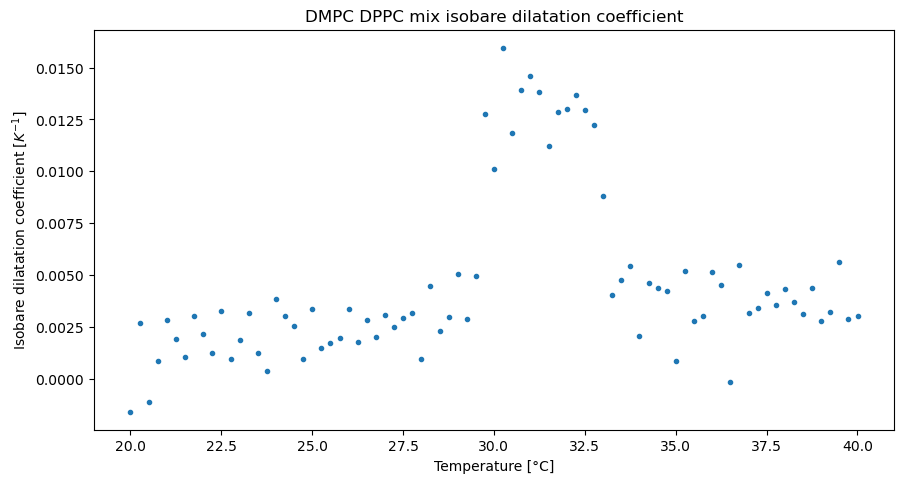

In [31]:
fig, ax = plt.subplots(1,figsize=(10, 5))

#ax.plot(Temperature, Spec_vol,'.')
#ax[0,1].plot(Temperature,Spec_vol_DPPC_CIPM,'.')
ax.plot(Temperature,alpha,'.')
#ax[1,1].plot(Temperature,alpha_CIPM,'.')

ax.set_xlabel('Temperature [°C]')
#ax[0,1].set_xlabel('T')
ax.set_ylabel('Isobare dilatation coefficient [$K^{-1}$]')
#ax[0,1].set_ylabel('v')
ax.set_title('DMPC DPPC mix isobare dilatation coefficient')
#ax[0,1].set_title('CIPM Method')
#ax[1,0].set_title('alpha using SB')
#ax[1,1].set_title('alpha using CIPM')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [5]:
np.polyfit(Temperature,np.log(Spec_vol_DPPC_SB),1)

array([ 0.00543173, -0.19845366])

In [6]:
np.polyfit(Temperature,np.log(Spec_vol_DPPC_CIPM),1)

array([ 0.00395286, -0.16639785])

In [11]:
M1 = 734
M2 = 678
M = np.mean([M1,M2])
Na = 6.02214076*10**(23)

vm = Spec_vol_DPPC_SB*M/Na*10**(24)


81